# **Importing necessary libraries:**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn

# **Loading MNIST and FMNIST datasets:**

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 138060613.61it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 89465061.91it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 42179585.62it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 15928535.76it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST('~/.pytorch/FashionMNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/FashionMNIST_data/', download=True, train=False, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 105852563.19it/s]


Extracting /root/.pytorch/FashionMNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FashionMNIST_data/MNIST/raw




100%|██████████| 28881/28881 [00:00<00:00, 71550911.89it/s]


Extracting /root/.pytorch/FashionMNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FashionMNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25520082.79it/s]


Extracting /root/.pytorch/FashionMNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FashionMNIST_data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 13387581.71it/s]


Extracting /root/.pytorch/FashionMNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FashionMNIST_data/MNIST/raw



In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.CIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('~/.pytorch/CIFAR10_data/', download=True, train=False, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 36918844.05it/s]


Extracting /root/.pytorch/CIFAR10_data/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10_data/
Files already downloaded and verified


In [ ]:
trainloader_mnist = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)

testloader_mnist = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
trainloader_fmnist = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)

testloader_fmnist = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
trainloader_cifar10 = torch.utils.data.DataLoader(trainset, batch_size=128
                                                    , shuffle=True, num_workers=2)

testloader_cifar10 = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)

In [ ]:
from tqdm import tqdm

pbar = tqdm(total=len(trainloader_mnist))
for idx, (data,label) in enumerate(trainloader_mnist):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()


  0%|          | 1/391 [15:31<100:52:23, 931.14s/it]

  0%|          | 1/938 [00:00<02:11,  7.14it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

In [ ]:
from tqdm import tqdm

pbar = tqdm(total=len(trainloader_fmnist))
for idx, (data,label) in enumerate(trainloader_fmnist):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()


  0%|          | 1/391 [1:04:48<421:18:15, 3888.96s/it]

  0%|          | 1/938 [00:00<01:48,  8.62it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

In [ ]:
from tqdm import tqdm

pbar = tqdm(total=len(trainloader_cifar10))
for idx, (data,label) in enumerate(trainloader_cifar10):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 1/391 [00:00<01:33,  4.18it/s]

0 torch.Size([128, 3, 32, 32]) torch.Size([128])


True

# **MLP Model on MNIST and FMNIST datasets:**

In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.bn1(self.fc1(x))))
        x = self.dropout2(self.relu2(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x


In [ ]:
import torch.optim as optim

optimizer = optim.Adam
num_epoch = 50

In [ ]:
input_dim=trainset[0][0].shape[0]*trainset[0][0].shape[1]*trainset[0][0].shape[2]

In [ ]:
import matplotlib.pyplot as plt
import time

def train(optimizer, model, trainloader, testloader):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr=0.0001)
    
    start_time = time.time()
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []

    for epoch in range(num_epoch):
        epoch_train_loss = 0
        epoch_test_loss = 0
        correct = 0
        best_tr_acc = 0
        total = 0

        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 784))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()         
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        tr_loss = epoch_train_loss / len(trainloader)
        tr_acc = correct / total
        train_loss.append(tr_loss)
        train_acc.append(tr_acc)
        if best_tr_acc < tr_acc:
            best_tr_acc = tr_acc

        correct = 0
        total = 0
        best_te_acc = 0

        for inputs, labels in testloader:
            outputs = model(inputs.view(-1, 784))
            loss = criterion(outputs, labels)
            epoch_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        te_loss = epoch_test_loss / len(testloader)
        te_acc = correct / total
        test_loss.append(te_loss)
        test_acc.append(te_acc)
        if best_te_acc < te_acc:
            best_te_acc = te_acc

        end_time = time.time()
        epoch_time = end_time - start_time

        print(f'Epoch {epoch + 1}, Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Time taken to calculate: {epoch_time:.2f} seconds.')

        start_time = end_time

    return train_acc, test_acc, train_loss, test_loss, best_tr_acc, best_te_acc


In [ ]:
model_mnist = MLP(784, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = train(optimizer, model_mnist, trainloader_mnist, testloader_mnist)


In [ ]:
model_fmnist = MLP(784, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss = train(optimizer, model_fmnist, trainloader_fmnist, testloader_fmnist)


In [ ]:
model_cifar10 = MLP(input_dim, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = train(optimizer, model_cifar10, trainloader_cifar10, testloader_cifar10)


In [ ]:
tr_acc_mnist = train_acc[num_epoch-1]
te_acc_mnist = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_mnist*100, "%")
print("Test Accuracy:", te_acc_mnist*100, "%")

Train Accuracy: 99.30666666666667 %
Test Accuracy: 97.47 %


In [ ]:
tr_acc_fmnist = train_acc[num_epoch-1]
te_acc_fmnist = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy on FMNIST:", tr_acc_fmnist*100, "%")
print("Test Accuracy on FMNIST:", te_acc_fmnist*100, "%")

Train Accuracy on FMNIST: 99.35000000000001 %
Test Accuracy on FMNIST: 97.63 %


In [ ]:
tr_acc_cifar10 = train_acc[num_epoch-1]
te_acc_cifar10 = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy on CIFAR10:", tr_acc_cifar10*100, "%")
print("Test Accuracy on CIFAR10:", te_acc_cifar10*100, "%")

Train Accuracy on CIFAR10: 68.44 %
Test Accuracy on CIFAR10: 51.470000000000006 %


In [ ]:
def plot_loss(vy, ty, ax, colors=['b']):
    x = list(range(11,num_epoch+1))
    ax.set_xlabel('Epochs->') 
    ax.set_ylabel('Categorical Crossentropy Loss->')
    
    ax.plot(x, vy, 'red', label="Test Loss")
    ax.plot(x, ty, 'green', label="Train Loss")

    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
def plot_acc(vy, ty, ax, colors=['b']):
    x = list(range(11,num_epoch+1))
    ax.set_xlabel('Epochs->') 
    ax.set_ylabel('Accuracy->')

    ax.plot(x, vy, 'red', label="Test Accuracy")
    ax.plot(x, ty, 'green', label="Train Accuracy")

    plt.legend()
    plt.grid()
    fig.canvas.draw()

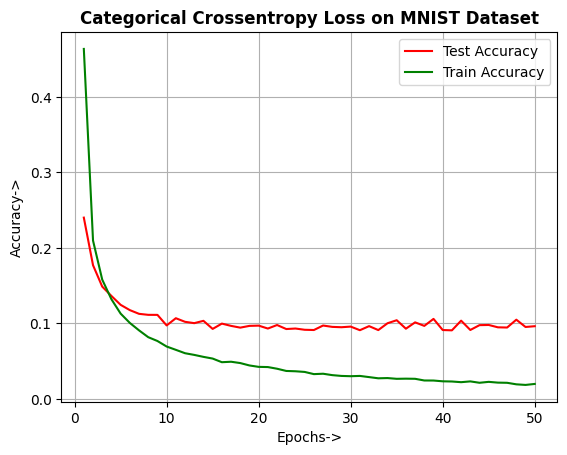

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on MNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

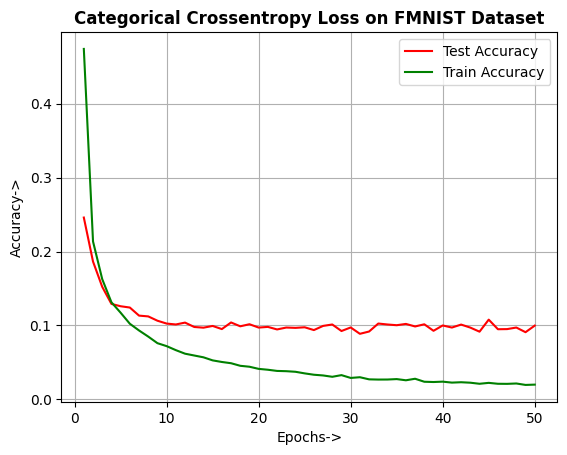

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on FMNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

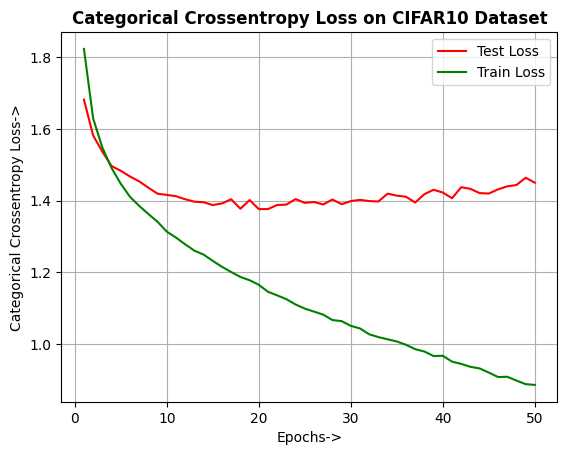

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on CIFAR10 Dataset', fontweight="bold")

plot_loss(test_loss, train_loss, ax)

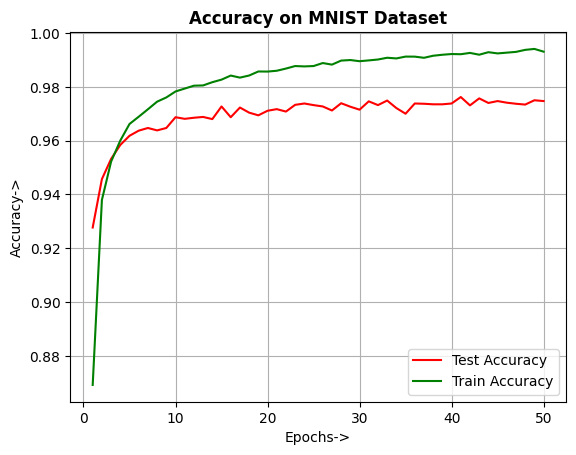

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on MNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

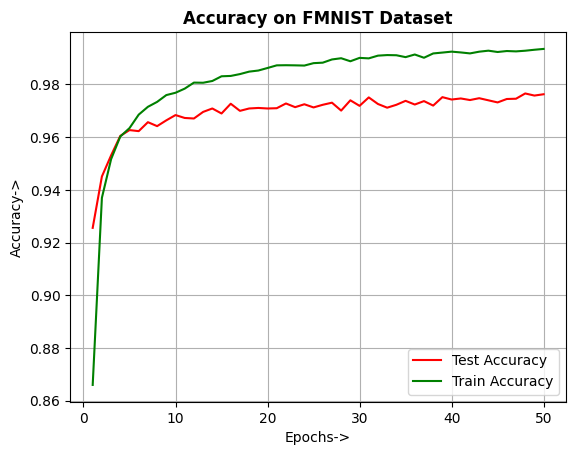

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on FMNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

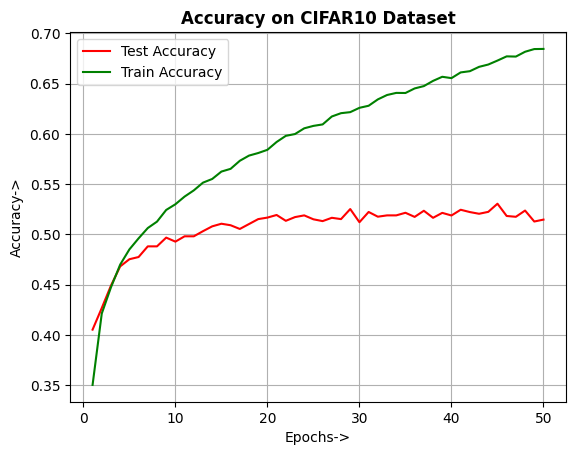

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on CIFAR10 Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

# **Applying ELU on the MLP model:**

In [ ]:
class MLP_IOC(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(MLP_IOC, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.elu1 = nn.ELU()
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.elu2 = nn.ELU()
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.dropout1(self.elu1(self.bn1(self.fc1(x))))
        x = self.dropout2(self.elu2(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x


In [ ]:
def ioc_train(optimizer, model, trainloader, testloader):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr=0.0001)
    
    start_time = time.time()
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []

    for epoch in range(num_epoch):
        epoch_train_loss = 0
        epoch_test_loss = 0
        correct = 0
        best_tr_acc = 0
        total = 0

        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 784))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            j = 0
            epsilon = 1e-5
            with torch.no_grad():
              for params in model.parameters():
                  if j != 0:
                    newparams=params.detach().clone()
                    params.copy_(torch.where(newparams < 0, torch.exp(newparams - epsilon), newparams))
                  j=j+1
            epoch_train_loss += loss.item()         
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        tr_loss = epoch_train_loss / len(trainloader)
        tr_acc = correct / total
        train_loss.append(tr_loss)
        train_acc.append(tr_acc)
        if best_tr_acc < tr_acc:
            best_tr_acc = tr_acc

        correct = 0
        total = 0
        best_te_acc = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs.view(-1, 784))
                loss = criterion(outputs, labels)
                epoch_test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            te_loss = epoch_test_loss / len(testloader)
            te_acc = correct / total
            test_loss.append(te_loss)
            test_acc.append(te_acc)
            if best_te_acc < te_acc:
                best_te_acc = te_acc

            end_time = time.time()
            epoch_time = end_time - start_time

            print(f'Epoch {epoch + 1}, Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Time taken to calculate: {epoch_time:.2f} seconds.')

            start_time = end_time

    return train_acc, test_acc, train_loss, test_loss, best_tr_acc, best_te_acc


In [ ]:
model_mnist_elu = MLP_IOC(784, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_mnist_elu, trainloader_mnist, testloader_mnist)


In [ ]:
torch.save(model_mnist_elu.state_dict(),"mnist_elu.pt")

In [ ]:
tr_acc_mnist_elu = train_acc[num_epoch-1]
te_acc_mnist_elu = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_mnist_elu*100, "%")
print("Test Accuracy:", te_acc_mnist_elu*100, "%")

Train Accuracy: 98.385 %
Test Accuracy: 96.59 %


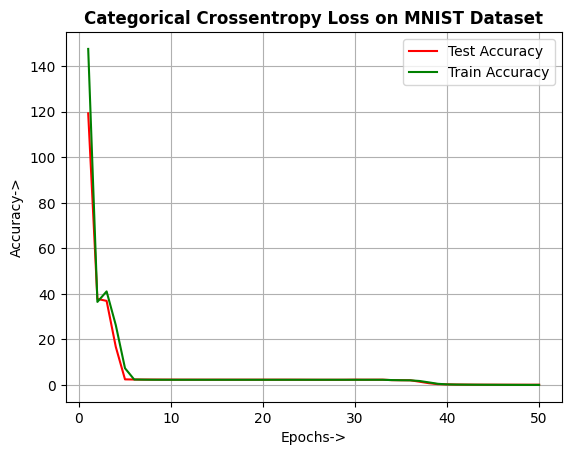

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on MNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

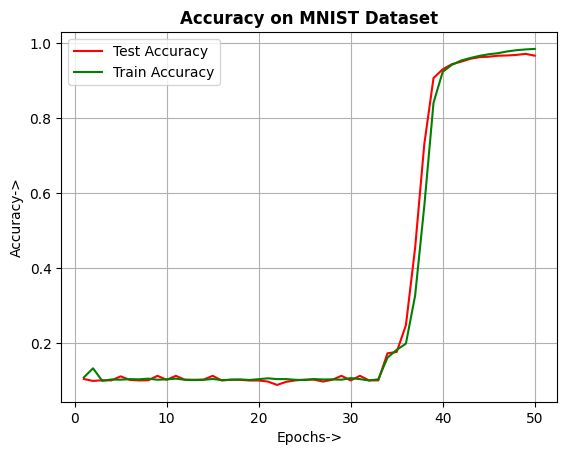

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on MNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

In [ ]:
model_fmnist_elu = MLP_IOC(784, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_fmnist_elu, trainloader_fmnist, testloader_fmnist)


In [ ]:
tr_acc_fmnist_elu = train_acc[num_epoch-1]
te_acc_fmnist_elu = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_fmnist_elu*100, "%")
print("Test Accuracy:", te_acc_fmnist_elu*100, "%")

Train Accuracy: 99.92 %
Test Accuracy: 97.95 %


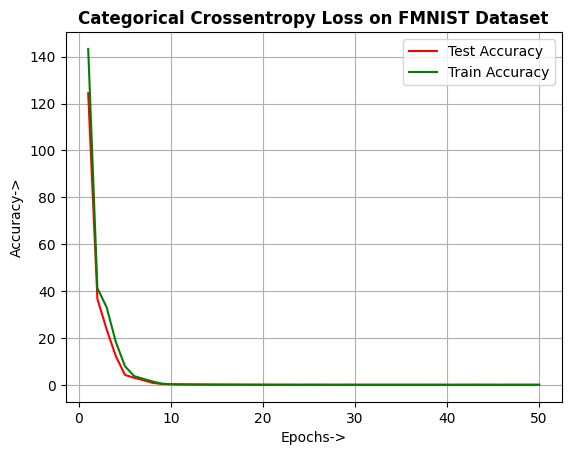

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on FMNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

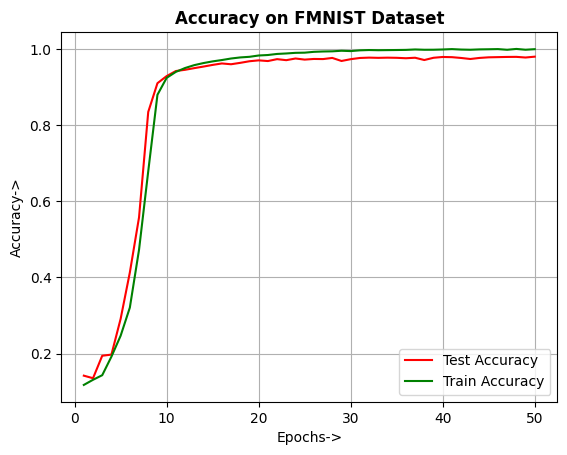

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on FMNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

In [ ]:
model_cifar10_elu = MLP_IOC(input_dim, 800, 10, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_cifar10_elu, trainloader_cifar10, testloader_cifar10)


In [ ]:
torch.save(model_cifar10_elu.state_dict(),"cifar10_ioc.pt")

In [ ]:
tr_acc_cifar10_elu = train_acc[num_epoch-1]
te_acc_cifar10_elu = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_cifar10_elu*100, "%")
print("Test Accuracy:", te_acc_cifar10_elu*100, "%")

Train Accuracy: 32.442 %
Test Accuracy: 31.56 %


In [ ]:
tr_acc_cifar10_elu_comp = train_acc[10:]
te_acc_cifar10_elu_comp = test_acc[10:]
tr_loss_cifar10_elu_comp = train_loss[10:]
te_loss_cifar10_elu_comp = test_loss[10:]

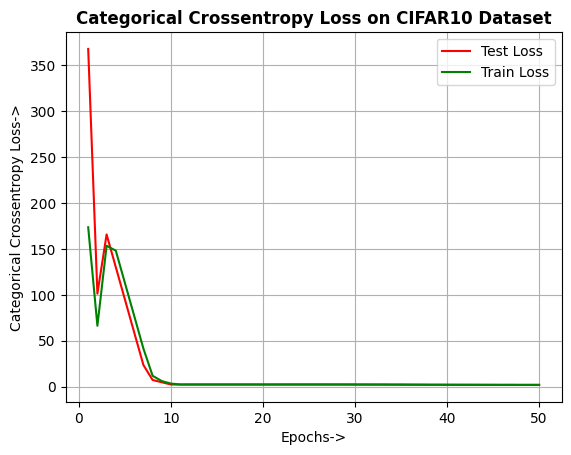

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on CIFAR10 Dataset', fontweight="bold")

plot_loss(test_loss, train_loss, ax)

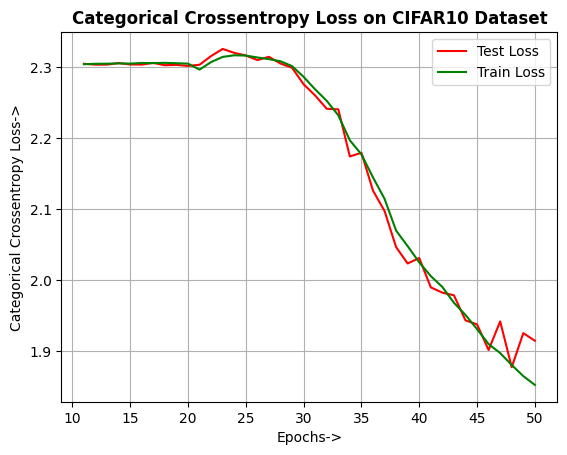

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on CIFAR10 Dataset', fontweight="bold")

plot_loss(te_loss_cifar10_elu_comp, tr_loss_cifar10_elu_comp, ax)

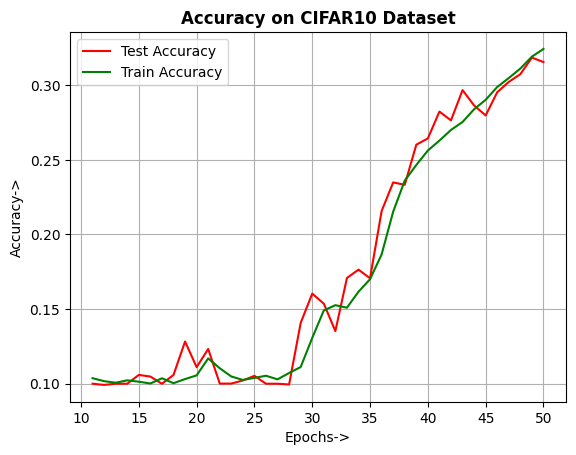

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on CIFAR10 Dataset', fontweight="bold")

plot_acc(te_acc_cifar10_elu_comp, tr_acc_cifar10_elu_comp, ax)

# **Adding Noise to the Model:**

In [ ]:
class MLP_IOC_Noise(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob, noise_prob):
        super(MLP_IOC_Noise, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.elu1 = nn.ELU()
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.elu2 = nn.ELU()
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.noise_prob = noise_prob

    def forward(self, x):
        x = self.dropout1(self.elu1(self.bn1(self.fc1(x))))
        x = self.dropout2(self.elu2(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        
        return x


In [ ]:
model_mnist_elu_noise = MLP_IOC_Noise(784, 800, 10, 0.5, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_mnist_elu_noise, trainloader_mnist, testloader_mnist)


In [ ]:
tr_acc_mnist_elu_noise = train_acc[num_epoch-1]
te_acc_mnist_elu_noise = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_mnist_elu_noise*100, "%")
print("Test Accuracy:", te_acc_mnist_elu_noise*100, "%")

Train Accuracy: 99.785 %
Test Accuracy: 96.8 %


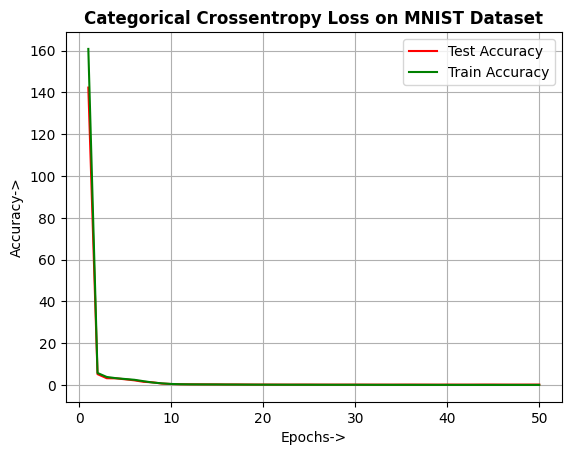

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on MNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

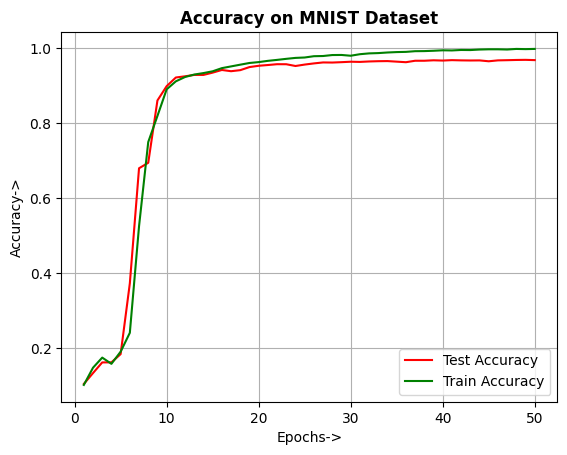

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on MNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

In [ ]:
model_fmnist_elu_noise = MLP_IOC_Noise(784, 800, 10, 0.5, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_fmnist_elu_noise, trainloader_fmnist, testloader_fmnist)


In [ ]:
tr_acc_fmnist_elu_noise = train_acc[num_epoch-1]
te_acc_fmnist_elu_noise = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_fmnist_elu_noise*100, "%")
print("Test Accuracy:", te_acc_fmnist_elu_noise*100, "%")

Train Accuracy: 99.94333333333333 %
Test Accuracy: 97.72 %


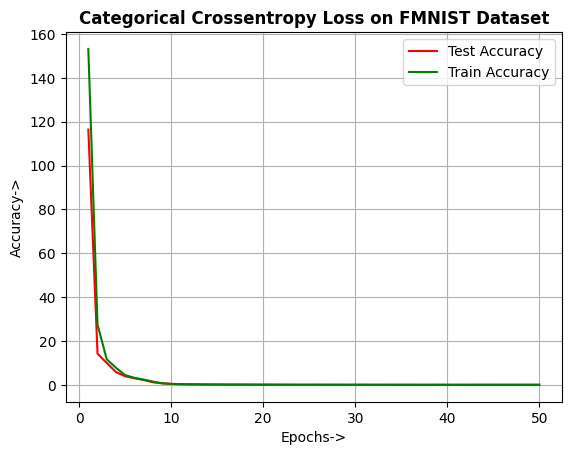

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on FMNIST Dataset', fontweight="bold")

plot_acc(test_loss, train_loss, ax)

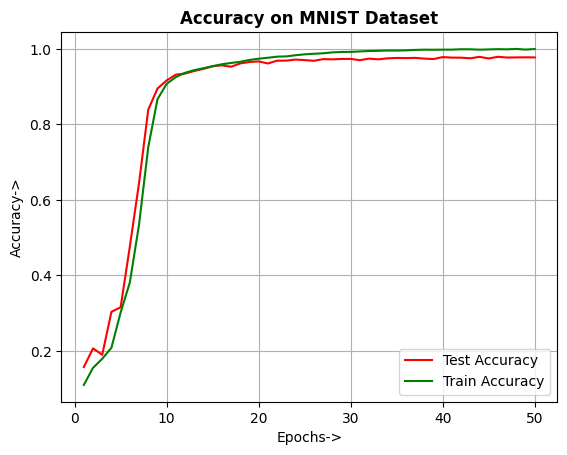

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on MNIST Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

In [ ]:
model_cifar10_elu_noise = MLP_IOC_Noise(input_dim, 800, 10, 0.5, 0.5)

train_acc, test_acc, train_loss, test_loss, train_accuracy, test_accuracy = ioc_train(optimizer, model_cifar10_elu_noise, trainloader_cifar10, testloader_cifar10)


In [ ]:
tr_acc_cifar10_elu_noise = train_acc[num_epoch-1]
te_acc_cifar10_elu_noise = test_acc[num_epoch-1]

In [ ]:
print("Train Accuracy:", tr_acc_cifar10_elu_noise*100, "%")
print("Test Accuracy:", te_acc_cifar10_elu_noise*100, "%")

Train Accuracy: 35.32 %
Test Accuracy: 33.98 %


In [ ]:
train_acc_comp = train_acc[10:]
test_acc_comp = test_acc[10:]
train_loss_comp = train_loss[10:]
test_loss_comp = test_loss[10:]

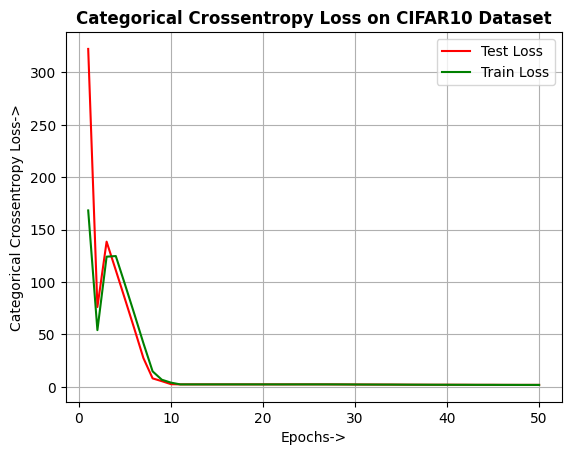

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on CIFAR10 Dataset', fontweight="bold")

plot_loss(test_loss, train_loss, ax)

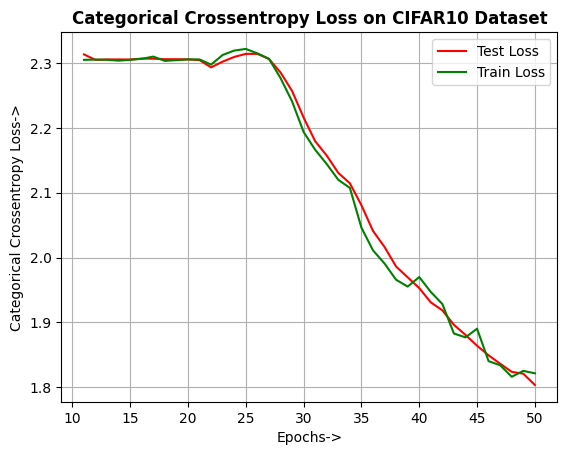

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Categorical Crossentropy Loss on CIFAR10 Dataset', fontweight="bold")

plot_loss(train_loss_comp, test_loss_comp, ax)

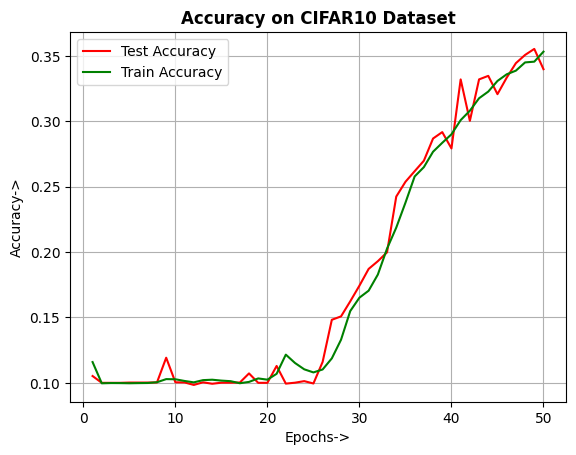

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on CIFAR10 Dataset', fontweight="bold")

plot_acc(test_acc, train_acc, ax)

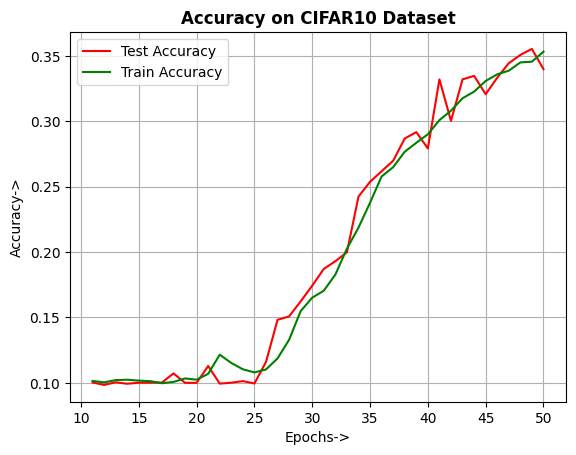

In [ ]:
fig,ax = plt.subplots(1,1)

ax.set_title('Accuracy on CIFAR10 Dataset', fontweight="bold")

plot_acc(test_acc_comp, train_acc_comp, ax)

In [ ]:
gen_gap_mnist = tr_acc_mnist - te_acc_mnist
gen_gap_fmnist = tr_acc_fmnist - te_acc_fmnist
gen_gap_cifar10 = tr_acc_cifar10 - te_acc_cifar10

gen_gap_mnist_elu = tr_acc_mnist_elu - te_acc_mnist_elu
gen_gap_fmnist_elu = tr_acc_fmnist_elu - te_acc_fmnist_elu
gen_gap_cifar10_elu = tr_acc_cifar10_elu - te_acc_cifar10_elu

gen_gap_mnist_elu_noise = tr_acc_mnist_elu_noise - te_acc_mnist_elu_noise
gen_gap_fmnist_elu_noise = tr_acc_fmnist_elu_noise - te_acc_fmnist_elu_noise
gen_gap_cifar10_elu_noise = tr_acc_cifar10_elu_noise - te_acc_cifar10_elu_noise


In [ ]:
print(gen_gap_mnist)
print(gen_gap_mnist_elu)
print(gen_gap_mnist_elu_noise)

0.020299999999999985
0.01795000000000002
0.029850000000000043


In [ ]:
print(gen_gap_fmnist)
print(gen_gap_fmnist_elu)
print(gen_gap_fmnist_elu_noise)

0.017200000000000104
0.01969999999999994
0.019449999999999967


In [ ]:
print(gen_gap_cifar10)
print(gen_gap_cifar10_elu)
print(gen_gap_cifar10_elu_noise)

0.16969999999999996
0.008819999999999995
0.013400000000000023
